## Basic EDA

### 0.  Load Env Variables

In [1]:
# #run this if running locally not requires if you used the docker script
# #!pip install python-dotenv
# from dotenv import load_dotenv
# load_dotenv(dotenv_path = '../.env')

### 1. Import requires packages

In [2]:
import pandas as pd
import seaborn as sns

from mlcore.data_helper import load_data
from mlcore.utils import set_logger


In [3]:
eda_logger = set_logger('EDA')

### 2 Load Data  and Explore
    
    

#### 2.1 load data from given files' (schemas)

A data_dict and helper function is used to allow data loaa from multiple files/data sources

In [4]:
data_dict = {
    'AB_NYC_2019':None,
}


for schema_name in data_dict:
    data_dict[schema_name] = load_data(schema_name, logger = eda_logger)

2022-03-29 11:04:05,884:Loaded schema AB_NYC_2019 in dataframe with shape (48895, 16)


In [5]:
abnb_data = data_dict['AB_NYC_2019']

In [6]:
abnb_data.iloc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [7]:
print(abnb_data.shape)

(48895, 16)


### 3. EDA

In [8]:
#Helper Functions
def snsplot_new_version(snsplot):
    snsplot.fig.subplots_adjust(top=0.9)
    for ax in snsplot.axes.ravel():
        for c in ax.containers:
            labels = [f'{(v.get_height()):.3f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')
        ax.margins(y=0.3)
    return snsplot


def snsplot(snsplot, title):
    
    snsplot.fig.subplots_adjust(top=0.9)

    ax = snsplot.facet_axis(0,0)
    for p in ax.patches:
        ax.text(p.get_x(),# - 0.01 , 
                p.get_height() * 1.02, 
               '{0:.2f}'.format(p.get_height()),   
                color='black', 
                rotation='horizontal', 
                size='large')
    ax.set_title(title)

def snsplot_y(snsplot,title):
    snsplot.fig.subplots_adjust(top=0.9)
    
    ax = snsplot.facet_axis(0,0)
    prevy = 0
    for p in ax.patches:
        
        x = p.get_x()
        y = p.get_y()
        val = p.get_width()
        #print(x, y, y-prevy)
        ax.text(
            (x+val)*1.05,
             y +0.5,
             #y *1.5,
            '{0:.2f}'.format(val),   
            color='black', 
            rotation='horizontal', 
            size='large')
        prevy = y
    ax.set_title(title)

### 3.1 Basic  Exploration

In [9]:
abnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
abnb_data['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [11]:
#check NA values
abnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 3.2 Price Distribution by Various Factors

(<seaborn.axisgrid.FacetGrid at 0x7fcfa4aff610>,)

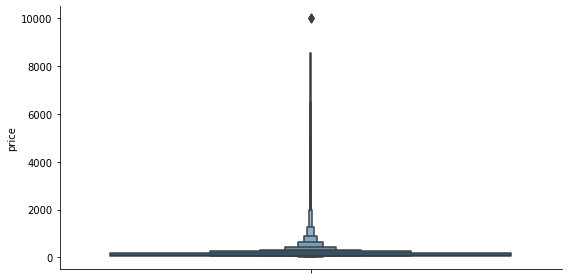

In [12]:
# check price distribution
sns.catplot(
    y='price', 
    data =abnb_data,
    kind = 'boxen',
    height=4, 
    aspect=2,

),

### 3.2.1 Remove Price Outliers ( All below graphs are after outlier removal)

(47744, 16)


(<seaborn.axisgrid.FacetGrid at 0x7fcfa4aac190>,)

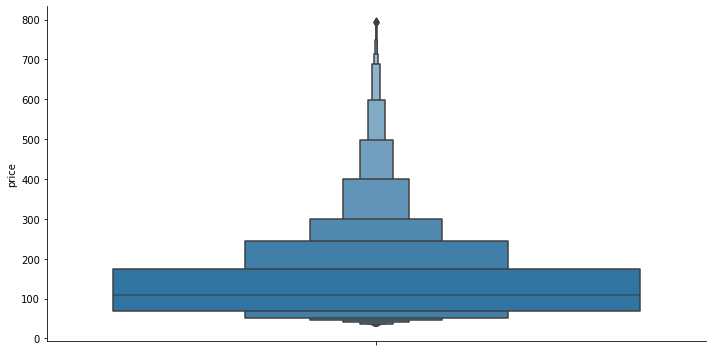

In [13]:
cutoff_low = abnb_data["price"].quantile(0.01)
cutoff_high  = abnb_data["price"].quantile(0.99)

abnb_data_filtered = abnb_data[(abnb_data["price"] < cutoff_high) & (abnb_data["price"] > cutoff_low)]
print(abnb_data_filtered.shape)
sns.catplot(
    y='price', 
    data =abnb_data_filtered,
    kind = 'boxen',
    height=5, 
    aspect=2,

),

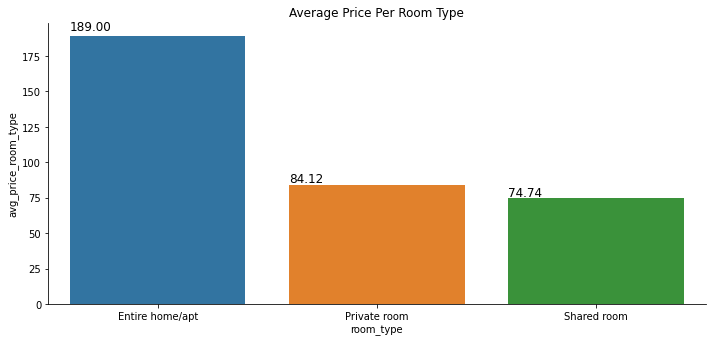

In [14]:
avg_price_by_room = abnb_data_filtered[['price', 'room_type']].groupby('room_type')['price'].mean().reset_index(name='avg_price_room_type')
snsplot(
    sns.catplot(
        y='avg_price_room_type', 
        x='room_type',
        data =avg_price_by_room,
        kind = 'bar',
        height=5, 
        aspect=2,
      
    ),
       "Average Price Per Room Type")


(<seaborn.axisgrid.FacetGrid at 0x7fcfa48dc7f0>,)

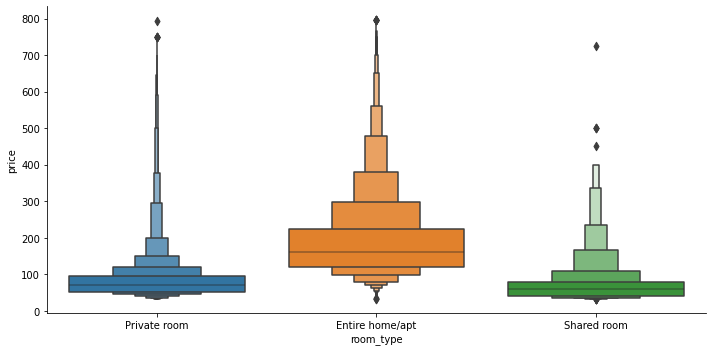

In [15]:
x = abnb_data_filtered[['room_type', 'price']]
sns.catplot(
    y='price', 
    x='room_type',
    data =x,
    kind = 'boxen',
    height=5, 
    aspect=2,

),

In [16]:
price_location = abnb_data.groupby(['neighbourhood','neighbourhood_group']).size().reset_index(name='price')
price_location_avg = price_location.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().reset_index(name='avg_price')
price_location_avg

,neighbourhood,neighbourhood_group,avg_price
0,Allerton,Bronx,42.0
1,Arden Heights,Staten Island,4.0
2,Arrochar,Staten Island,21.0
3,Arverne,Queens,77.0
4,Astoria,Queens,900.0
...,...,...,...
216,Windsor Terrace,Brooklyn,157.0
217,Woodhaven,Queens,88.0
218,Woodlawn,Bronx,11.0
219,Woodrow,Staten Island,1.0


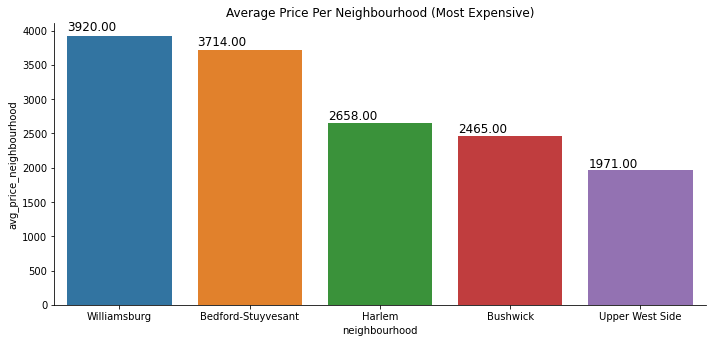

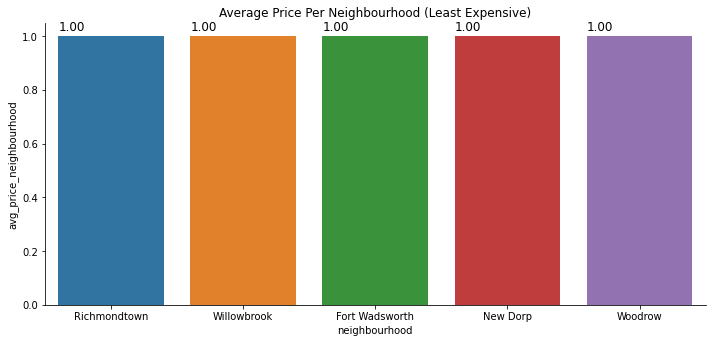

In [17]:
avg_price_neighbourhood = price_location.groupby('neighbourhood')['price'].mean().reset_index(name='avg_price_neighbourhood')
top_10_avg_price_neighbourhood = avg_price_neighbourhood.sort_values('avg_price_neighbourhood',ascending=False)
snsplot(
    sns.catplot(
        y='avg_price_neighbourhood', 
        x='neighbourhood',
        data =top_10_avg_price_neighbourhood.head(5),
        kind = 'bar',
        height=5, 
        aspect=2,
      
    ),
       "Average Price Per Neighbourhood (Most Expensive)")


snsplot(
    sns.catplot(
        y='avg_price_neighbourhood', 
        x='neighbourhood',
        data =top_10_avg_price_neighbourhood.tail(5),
        kind = 'bar',
        height=5, 
        aspect=2,
      
    ),
       "Average Price Per Neighbourhood (Least Expensive)")